# Project 1: Exploring the difference between schools of philosophy

### Jiapeng Xu JX2427 Date: 09/20/2022
For most people, philosophy maybe obscure and confusing. It usually takes lots of time to understand the overall conceptions between different schools of philosophy. However, taking advantage of this project, we can hand over this problem to our computer, solving this by NLP and machine learning. In this project, exploratory data analysis was first conducted to get some insights hidden in the dataset by visualizing. Then, according to the matrix of token counts, different schools of philosophy were clustered together to understand the similarity between them. In the last step, by using sentiment analysis classification, our algorithm acquired the ability to predict the corresponding school after seeing the sentence only.

In [1]:
# Packages
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi
from wordcloud import WordCloud, STOPWORDS

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import random

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram,linkage

## Step1: Data harvest: read the csv file and check the basic information of the dataset

In [2]:
# Read data
df = pd.read_csv("../Project 1/philosophy_data.csv")

In [3]:
# Structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   sentence_str               360808 non-null  object
 5   original_publication_date  360808 non-null  int64 
 6   corpus_edition_date        360808 non-null  int64 
 7   sentence_length            360808 non-null  int64 
 8   sentence_lowered           360808 non-null  object
 9   tokenized_txt              360808 non-null  object
 10  lemmatized_str             360808 non-null  object
dtypes: int64(3), object(8)
memory usage: 30.3+ MB


In [4]:
# Preview
df.head(10)

title author school  \
0  Plato - Complete Works  Plato  plato   
1  Plato - Complete Works  Plato  plato   
2  Plato - Complete Works  Plato  plato   
3  Plato - Complete Works  Plato  plato   
4  Plato - Complete Works  Plato  plato   
5  Plato - Complete Works  Plato  plato   
6  Plato - Complete Works  Plato  plato   
7  Plato - Complete Works  Plato  plato   
8  Plato - Complete Works  Plato  plato   
9  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   
5                 But someone else has indicted you?   
6        I do not really know him myself, Euthyphro.   
7                He is apparently young and unknown.   
8                  They call him Meletus, I believe.   
9  He belongs to the Pitthean deme, if you know a...   

                                        sentence_str  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   
5                 But someone else has indicted you?   
6        I do not really know him myself, Euthyphro.   
7                He is apparently young and unknown.   
8                  They call him Meletus, I believe.   
9  He belongs to the Pitthean deme, if you know a...   

   original_publication_date  corpus_edition_date  sentence_length  \
0                       -350                 1997              125   
1                       -350                 1997               69   
2                       -350                 1997               74   
3                       -350                 1997               21   
4                       -350                 1997              101   
5                       -350                 1997               34   
6                       -350                 1997               43   
7                       -350                 1997               35   
8                       -350                 1997               33   
9                       -350                 1997              147   

                                    sentence_lowered  \
0   what's new, socrates, to make you leave your ...   
1  surely you are not prosecuting anyone before t...   
2  the athenians do not call this a prosecution b...   
3                              what is this you say?   
4  someone must have indicted you, for you are no...   
5                 but someone else has indicted you?   
6        i do not really know him myself, euthyphro.   
7                he is apparently young and unknown.   
8                  they call him meletus, i believe.   
9  he belongs to the pitthean deme, if you know a...   

                                       tokenized_txt  \
0  ['what', 'new', 'socrates', 'to', 'make', 'you...   
1  ['surely', 'you', 'are', 'not', 'prosecuting',...   
2  ['the', 'athenians', 'do', 'not', 'call', 'thi...   
3               ['what', 'is', 'this', 'you', 'say']   
4  ['someone', 'must', 'have', 'indicted', 'you',...   
5  ['but', 'someone', 'else', 'has', 'indicted', ...   
6  ['do', 'not', 'really', 'know', 'him', 'myself...   
7  ['he', 'is', 'apparently', 'young', 'and', 'un...   
8      ['they', 'call', 'him', 'meletus', 'believe']   
9  ['he', 'belongs', 'to', 'the', 'pitthean', 'de...   

                                      lemmatized_str  
0     what be new , Socrates , to make -PRON- lea...  
1   surely -PRON- be not prosecute anyone before ...  
2   the Athenians do not call this a prosecution ...  
3                          what be this -PRON- say ?  
4   someone must have indict -PR

In [5]:
# Check if this dataset contain duplicates
df.duplicated().sum()

0

## Step2: Exploratory data analysis

There are 59 kinds of titles in total. 
The distribution of titles are plotted below:


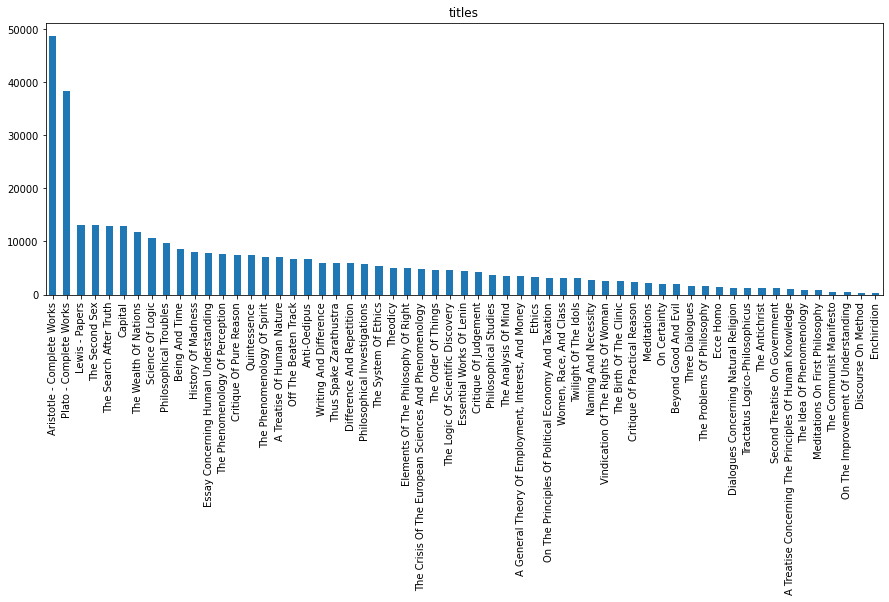

In [6]:
# Check how many kinds of titles in this dataset. And plot the distribution of titles.
print(f'There are {len(df.title.unique())} kinds of titles in total. \nThe distribution of titles are plotted below:')

df.title.value_counts().plot.bar(figsize = (15,5), title = 'titles');

By this plot, we find the number of 'Aristotle - Complete Works' and 'Plato - Complete Works' are the most.

There are 36 kinds of authors in total. 
The distribution authors are plotted below:


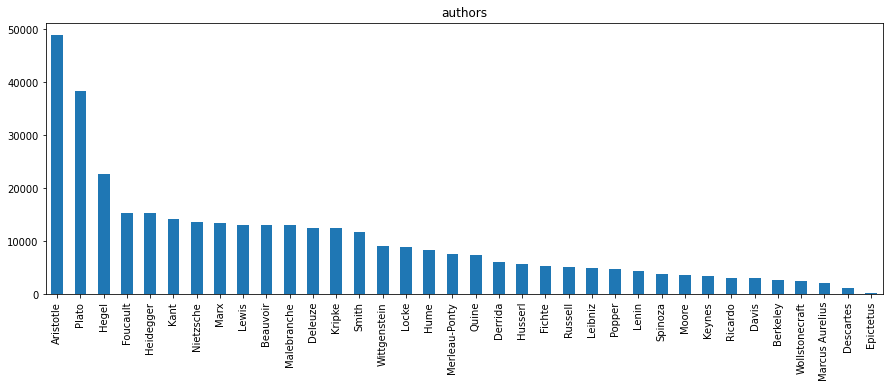

In [7]:
# Check how many kinds of authors in this dataset. And plot the distribution of authors.
print(f'There are {len(df.author.unique())} kinds of authors in total. \nThe distribution authors are plotted below:')
df.author.value_counts().plot.bar(figsize = (15,5), title = 'authors');

Similar to the previous one, among all authors, the number of 'Aristotle' and 'Plato' are the most.

There are 13 kinds of schools in total. 
The distribution schools are plotted below:


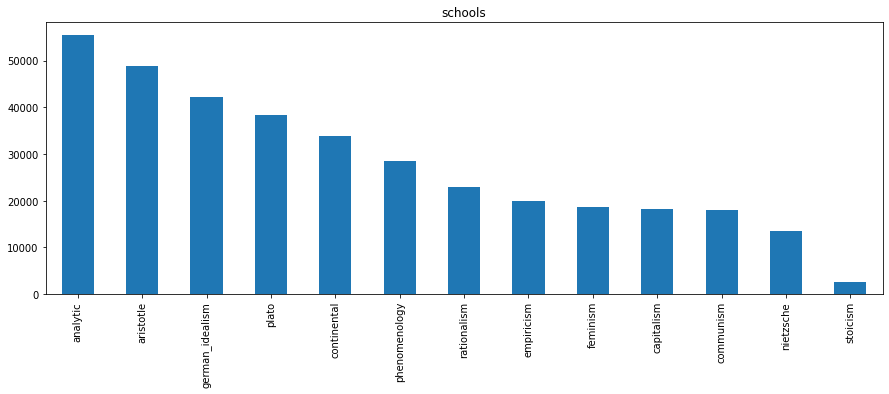

In [8]:
# Check how many kinds of schools in this dataset. And plot the distribution of schools.
print(f'There are {len(df.school.unique())} kinds of schools in total. \nThe distribution schools are plotted below:')
df.school.value_counts().plot.bar(figsize = (15,5), title = 'schools');

This diagram shows the number of 'stoicism' is the least.

count    360808.000000
mean        150.790964
std         104.822072
min          20.000000
25%          75.000000
50%         127.000000
75%         199.000000
max        2649.000000
Name: sentence_length, dtype: float64


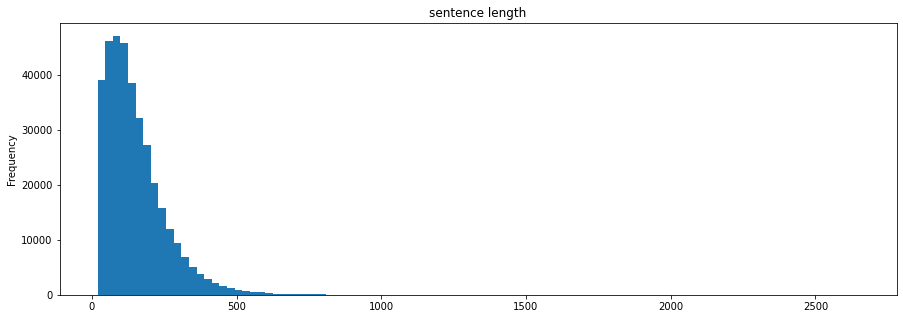

In [9]:
# Check the distribution of sentence length 
print(df.sentence_length.describe())
df.sentence_length.plot.hist(bins = 100, figsize = (15,5), title = 'sentence length');

By this table and diagram, we can find the distribution of sentence length. Most of the sentence lengths are in the range between 0 and 500. The mean and standard deviation of sentence length are 151 and 105, respectively.

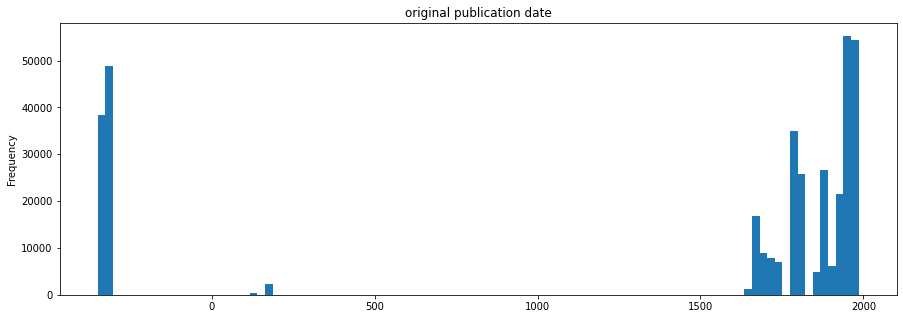

In [10]:
# Check the distribution of original publication date
df.original_publication_date.plot.hist(bins = 100, figsize = (15,5), title = 'original publication date');

According to the above diagram, most original publication dates are between 1500 and 2000. A small proportion are located at 350 BC.

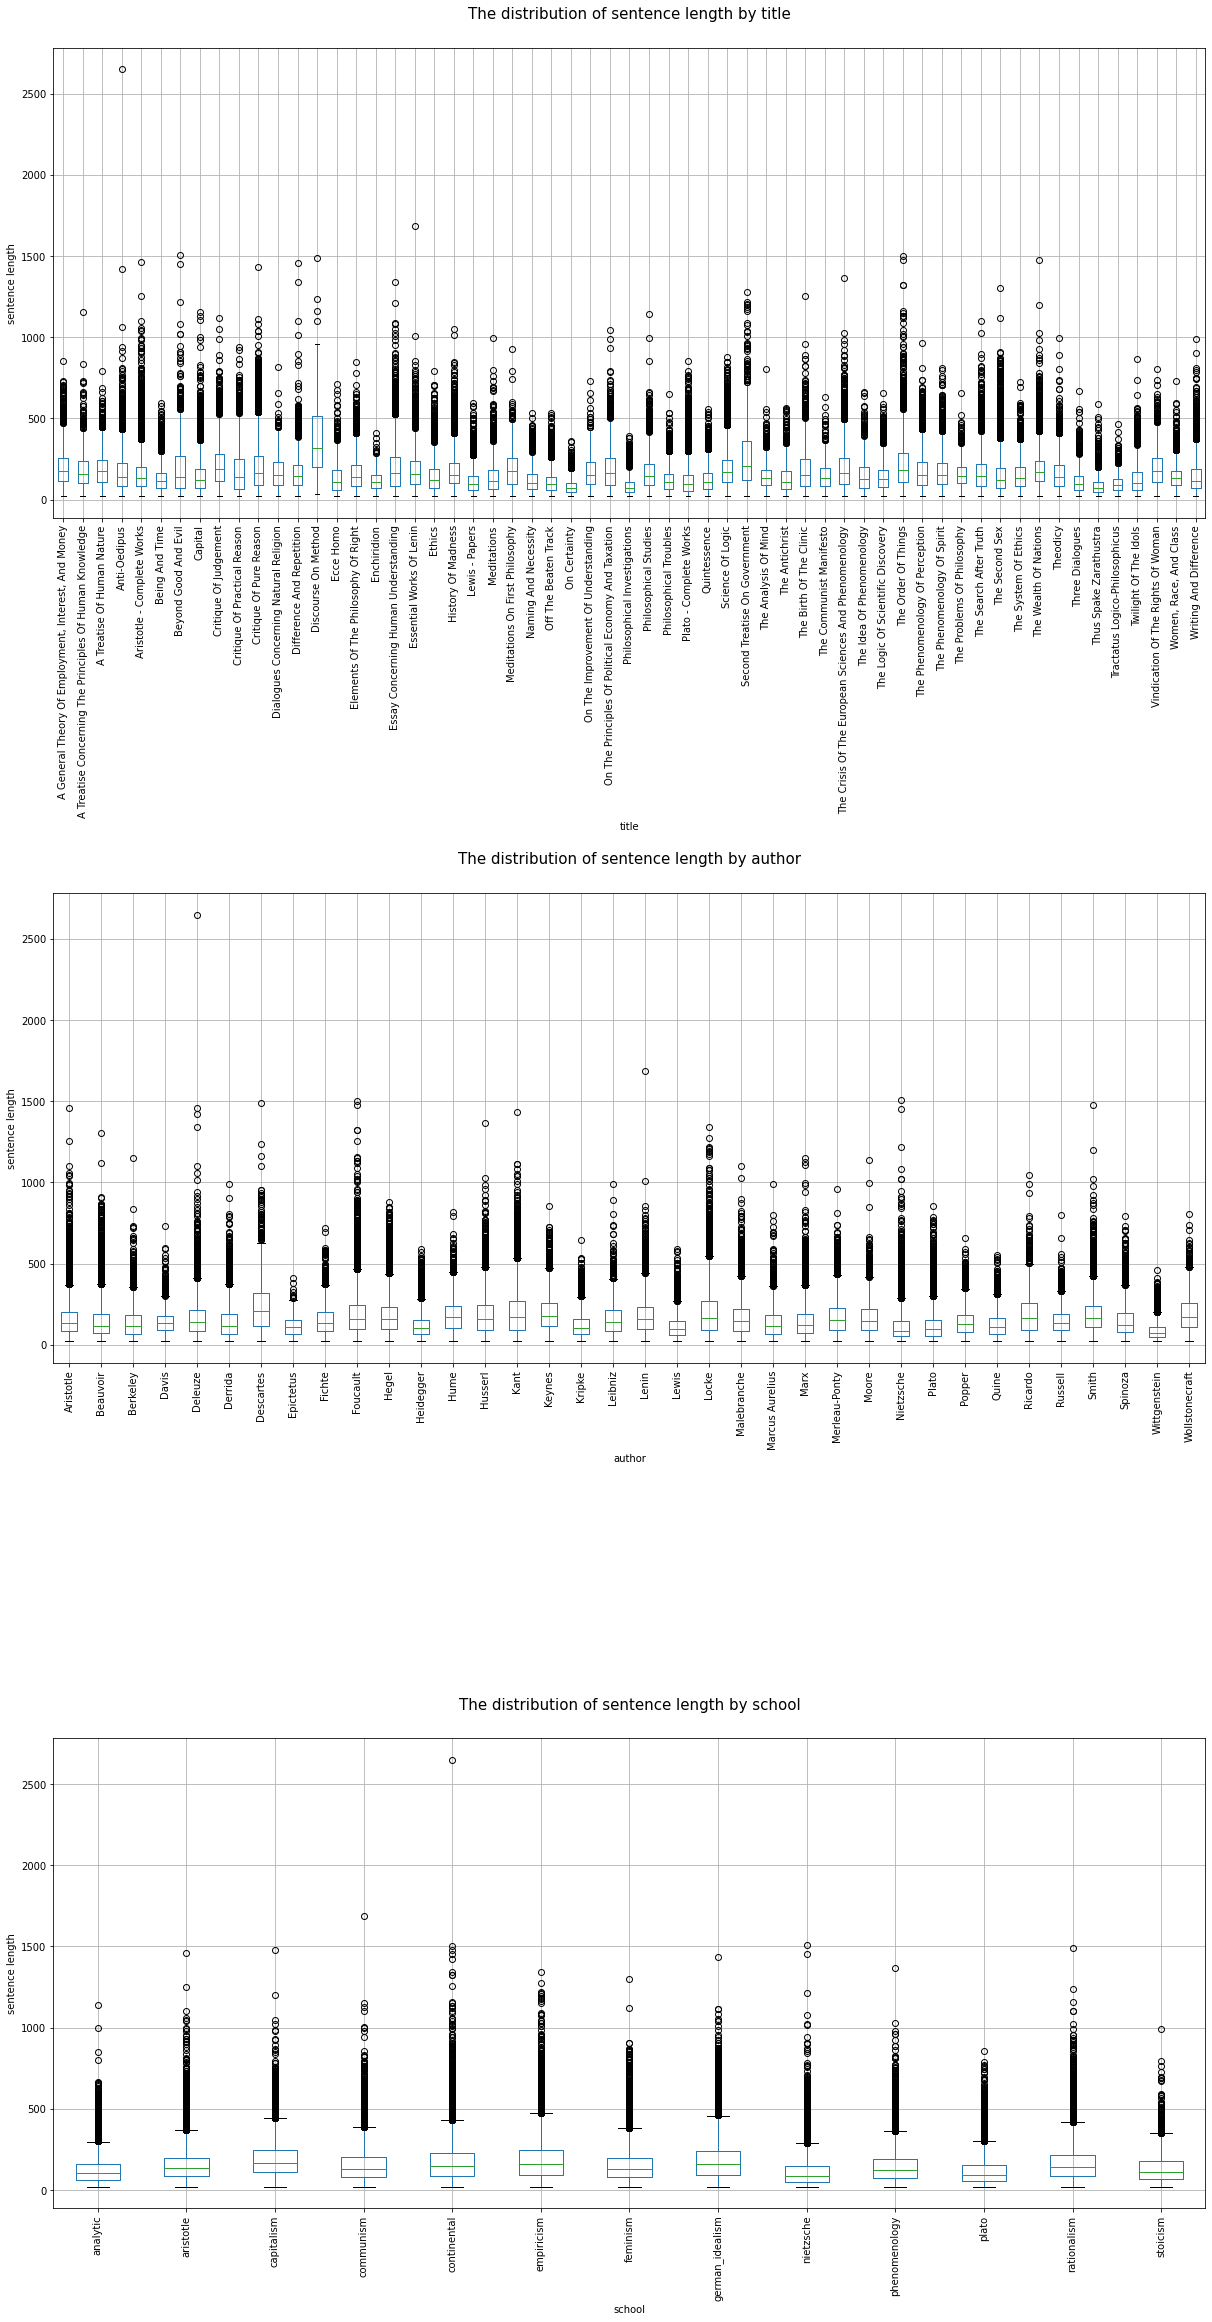

In [11]:
# Plot the distribution of sentence length by title, author, and school. 
fig1, axs1 = plt.subplots(3, figsize = (20,40))
fig1.subplots_adjust(hspace=0.8)

df.boxplot(column = 'sentence_length', by = 'title', rot = 90, ax = axs1[0]);
df.boxplot(column = 'sentence_length', by = 'author', rot = 90, ax = axs1[1]);
df.boxplot(column = 'sentence_length', by = 'school', rot = 90, ax = axs1[2]);
axs1[0].set_title('The distribution of sentence length by title', fontsize = 15, y = 1.05)
axs1[1].set_title('The distribution of sentence length by author', fontsize = 15, y = 1.05)
axs1[2].set_title('The distribution of sentence length by school', fontsize = 15, y = 1.05)
axs1[0].set_ylabel('sentence length')
axs1[1].set_ylabel('sentence length')
axs1[2].set_ylabel('sentence length')
fig1.suptitle('');

According to the above three boxplots, sentences in 'Discourse on methods' and 'Second treatise on goverment' tend to have a bigger length. All the other titles, authors, and schools tend to express opinions using similar length.

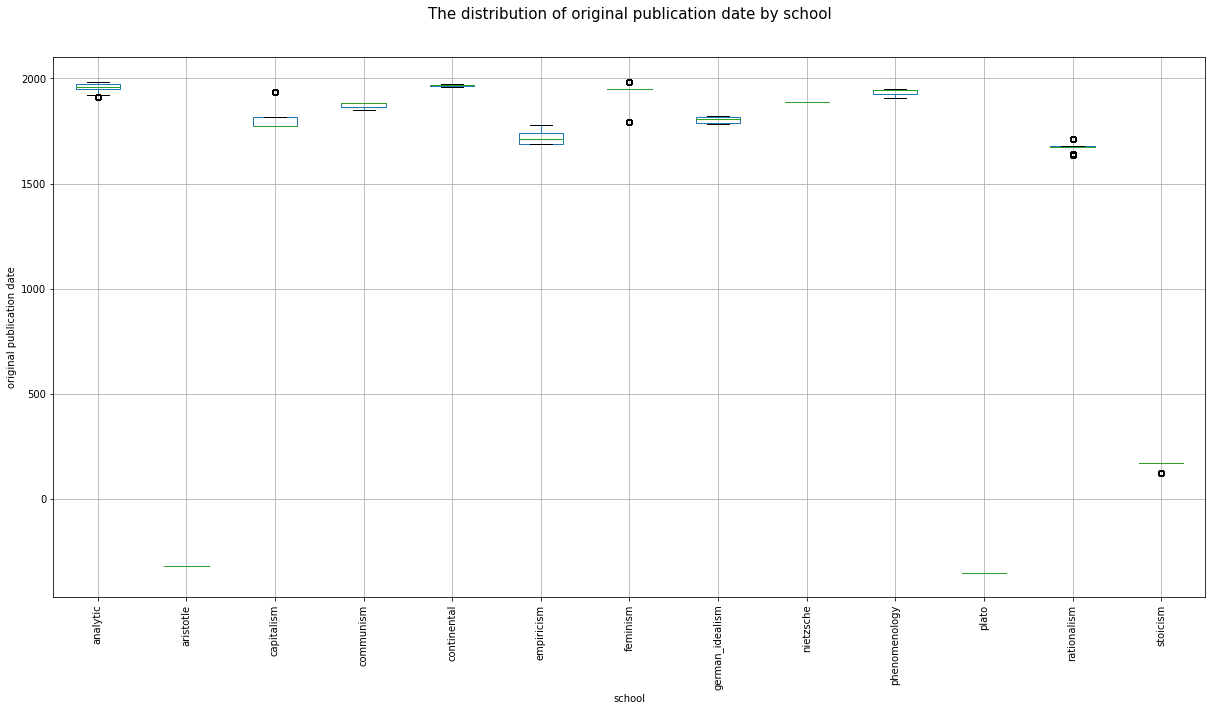

In [12]:
# Plot the distribution of original publication date by school to see in which century it is.
df.boxplot(column = 'original_publication_date', by = 'school', rot = 90, figsize = (20, 10));
plt.suptitle('The distribution of original publication date by school', fontsize = 15, y = 0.97);
plt.title('');
plt.ylabel('original publication date');

From this boxplot, we find 'aristotle', 'plato', and 'stoicism' have a relatively longer history. All the others are located in a similar period

In [48]:
# Check the mean original publication date and mean sentence length grouped by school, author, and title.
table = df.groupby(by = ['author', 'title'], as_index = False)[['original_publication_date', 'sentence_length']].mean().set_index('author')\
.join(df.groupby(by = ['school', 'author'], as_index = False)\
      [['original_publication_date', 'sentence_length']].mean().set_index('author'),\
      how = 'left',
      lsuffix = '_by_title').reset_index().set_index('school')\
.join(df.groupby(by = 'school')[['original_publication_date', 'sentence_length']].mean(),
      how = 'left',
      lsuffix = '_by_author',
      rsuffix = '_by_school').reset_index().round({'original_publication_date_by_school': 0,
                                                   'original_publication_date_by_author': 0,
                                                   'original_publication_date_by_title': 0,
                                                   'sentence_length_by_school': 2,
                                                   'sentence_length_by_author': 2,
                                                   'sentence_length_by_title': 2})\
.astype({'original_publication_date_by_school': 'int32',
         'original_publication_date_by_author': 'int32',
         'original_publication_date_by_title': 'int32'})\
.set_index(['school',
            'original_publication_date_by_school',
            'sentence_length_by_school',
            'author',
            'original_publication_date_by_author',
            'sentence_length_by_author',
            'title'])

dfi.export(table,"mytable.png")

table

original_publication_date_by_title  \
school          original_publication_date_by_school sentence_length_by_school author          original_publication_date_by_author sentence_length_by_author title                                                                                    
analytic         1959                               119.03                    Kripke           1974                               119.03                    Naming And Necessity                                                              1972   
                                                                                                                                                            Philosophical Troubles                                                            1975   
                                                                              Lewis            1985                               109.72                    Lewis - Papers                                                                    1985   
                                                                              Moore            1910                               167.25                    Philosophical Studies                                                             1910   
                                                                              Popper           1959                               139.55                    The Logic Of Scientific Discovery                                                 1959   
                                                                              Quine            1950                               121.64                    Quintessence                                                                      1950   
                                                                              Russell          1918                               146.30                    The Analysis Of Mind                                                              1921   
                                                                                                                                                            The Problems Of Philosophy                                                        1912   
                                                                              Wittgenstein     1948                               84.88                     On Certainty                                                                      1950   
                                                                                                                                                            Philosophical Investigations                                                      1953   
                                                                                                                                                            Tractatus Logico-Philosophicus                                                    1921   
aristotle       -320                                153.22                    Aristotle       -320                                153.22                    Aristotle - Complete Works                                                        -320   
capitalism       1813                               187.58                    Keynes           1936                               196.65                    A General Theory Of Employment, Interest, And M...                                1936   
                                                                              Ricardo          1817                               186.25                    On The Principles Of Political Economy And Taxa...                                1817   
                                                                              Smith            1776                               185.28                    The Wealth Of Nations                                                             1776   
communism        1877     

This table lists precisely the mean sentence length and original publication date by each school, authors, and titles. Similar insights can be generated from this table.

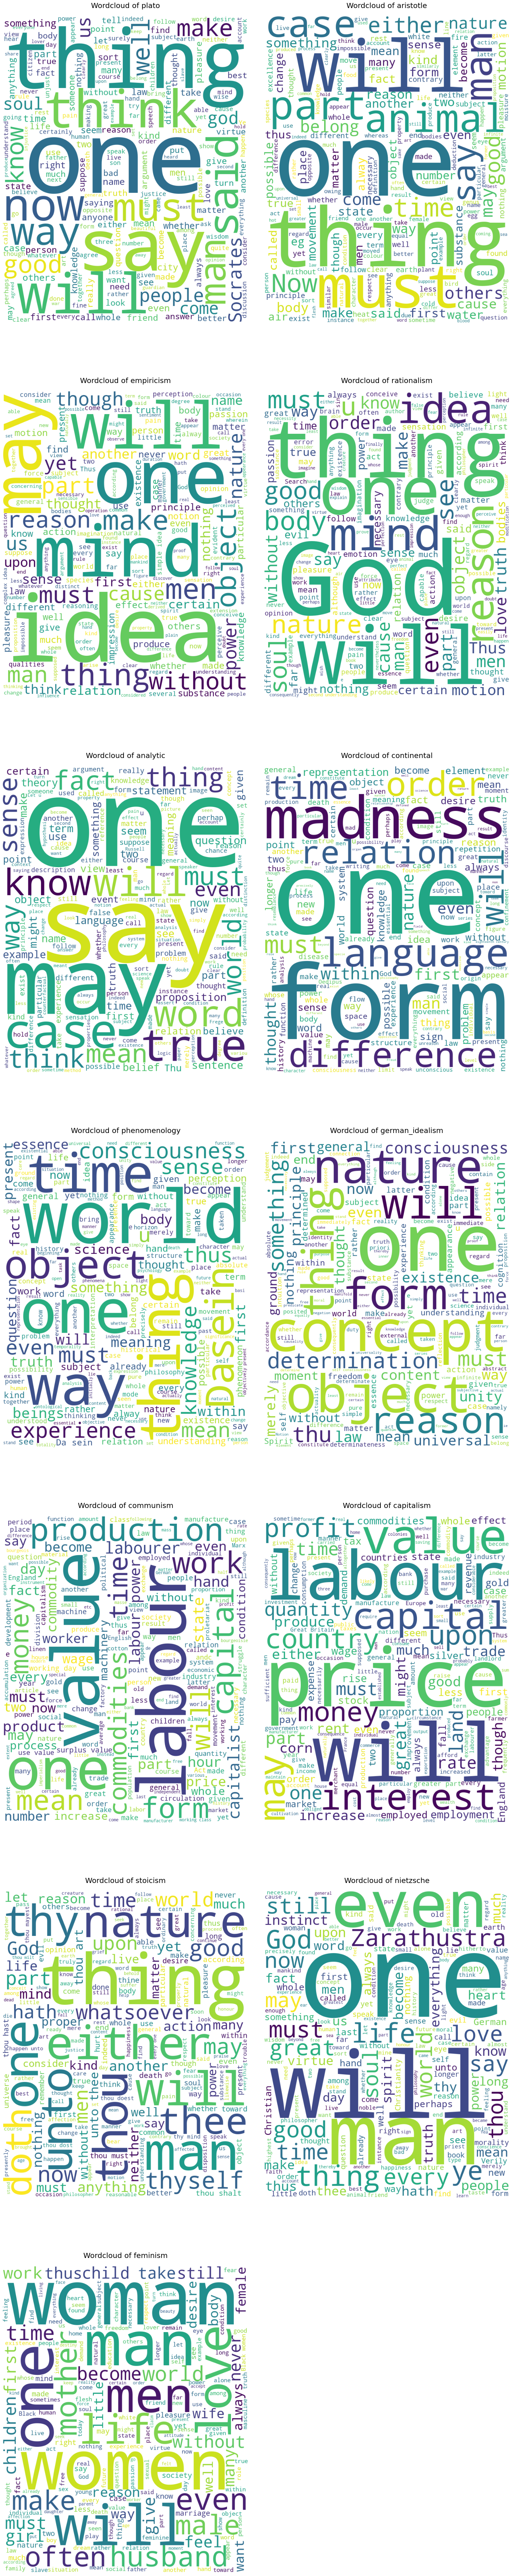

In [14]:
# Plot the wordclouds of each school
stopwords = set(STOPWORDS)

fig2, axs2 = plt.subplots(7,2, figsize = (20, 100))
fig2.tight_layout()
axs2 = axs2.ravel()
fig2.delaxes(axs2[13])

school_list = list(df.school.unique())

for i in school_list:
    corpus_i = df.loc[df.school == i, 'sentence_str'].tolist()
    corpus_i = ''.join(corpus_i)
    wordcloud = WordCloud(width = 800, 
                          height = 1000, 
                          background_color = 'white',                                                 
                          stopwords = stopwords, 
                          min_font_size = 10).generate(corpus_i)
    axs2[school_list.index(i)].imshow(wordcloud)
    axs2[school_list.index(i)].set_title('Wordcloud of ' + i, fontsize = 20, y = 1.02);
    axs2[school_list.index(i)].axis('off')

Wordcloud of each school of philosophy were plotted above, from which we are able to find the word pattern between different schools

## Step3: Clustering of schools

In [23]:
# Create a new corpus grouped by schools
corpus_by_school = []

for i in school_list:
    corpus_i = df.loc[df.school == i, 'sentence_str'].tolist()
    corpus_i = ''.join(corpus_i)
    corpus_by_school.append(corpus_i)

In [24]:
# Use 'TfidfVectorizer' to convert the new corpus into a matrix of normalized token counts
TfidfVec = TfidfVectorizer(lowercase = True,
                           min_df = 5,
                           max_df = 0.8,
                           ngram_range = (1,1))
X_vec = TfidfVec.fit_transform(corpus_by_school)
X_vec_df = pd.DataFrame.sparse.from_spmatrix(X_vec, 
                                             index = school_list,
                                             columns = list(dict(sorted(TfidfVec.vocabulary_.items(), key = lambda x: x[1])).keys()))

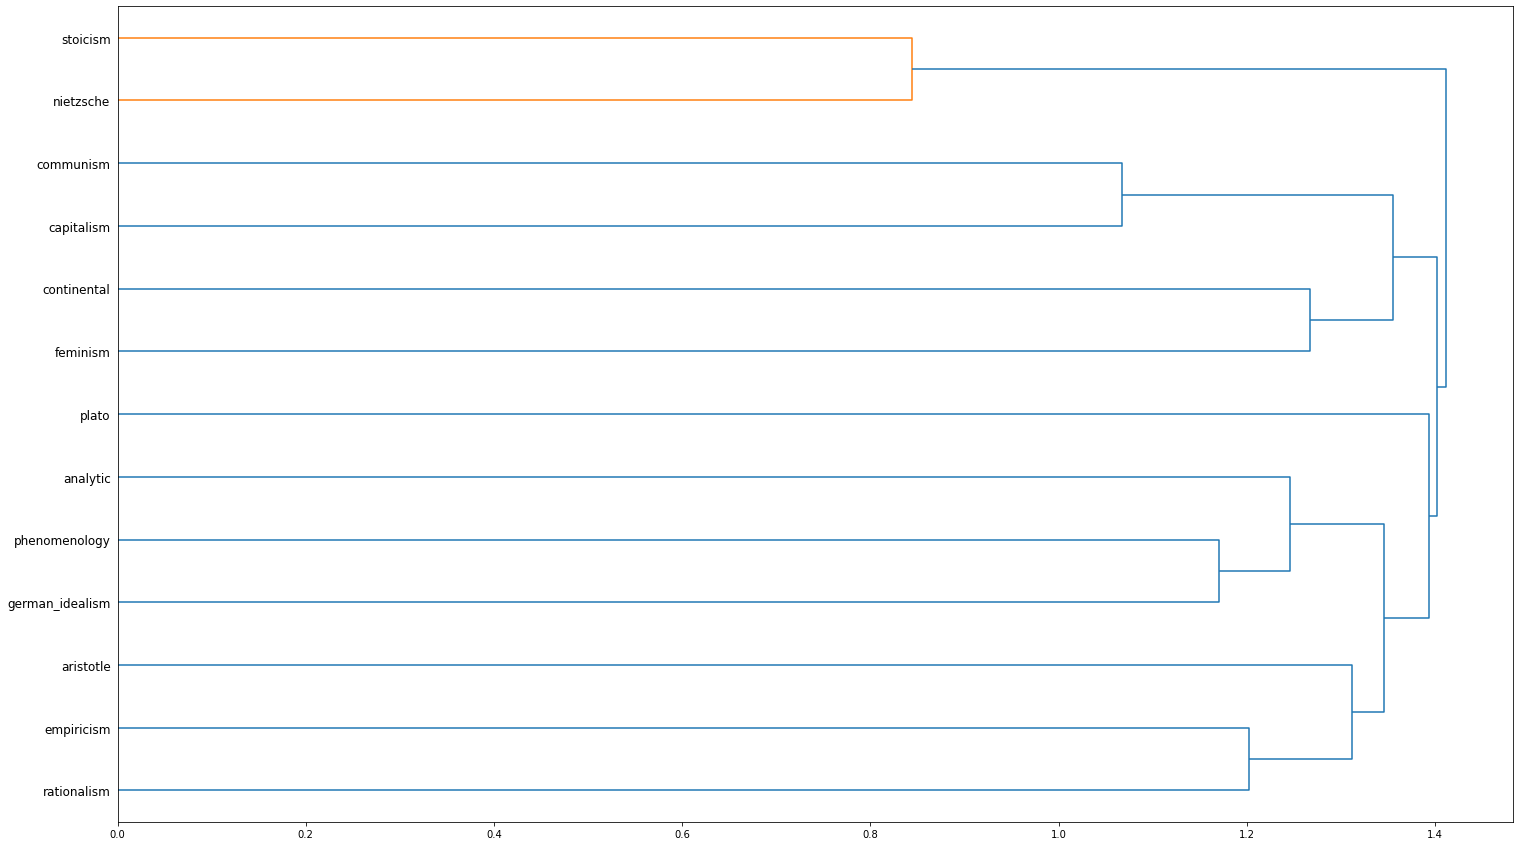

In [25]:
# Use HAC to cluster all the schools and plot the dendrogram
HAC = linkage(pdist(X_vec_df, metric = 'euclidean'), method = 'complete')

plt.figure(figsize=(25, 15))
dendrogram(HAC,
           orientation = 'right',
           labels = school_list,
           distance_sort = 'descending',
           show_leaf_counts = False)
plt.show()

Hierarchical clustering was conducted in this step. According to the dendrogram, we find that 'stoicism' and 'nietzsche' are the most similar schools. After this pair, 'communism' and 'capitalism' are most similar.

## Step4: Sentiment analysis

In [37]:
# Define the corpus
corpus = list(df.sentence_str)

In [38]:
# Use 'OrdinalEncoder' to transfer schools into numbers
encoder = OrdinalEncoder()
Y_2d = encoder.fit_transform(np.array(df.school).reshape(len(df.school),1))
Y = Y_2d.reshape(len(df.school),).astype('int64')

In [39]:
# Train & Test split
X_train, X_test, Y_train, Y_test = train_test_split(corpus, Y)

In [40]:
# Use a pipeline to wrap vectorizer and classifier together
# After fitting the pipeline, calculate the cross validation accuracy and test set accuracy of the model
pipe_sa = Pipeline([('TfidfVec', TfidfVectorizer(lowercase = True,
                                                 min_df = 5,
                                                 max_df = 0.8,
                                                 ngram_range = (1,1))),
                    ('lr', LogisticRegression(C = 1,
                                              penalty = 'l2',
                                              multi_class = 'multinomial', 
                                              max_iter = 1000))])
pipe_sa.fit(X_train, Y_train)
cv_score_pipe = cross_val_score(pipe_sa, X_train, Y_train) 
print(f'pipe cv accuracy: {cv_score_pipe.mean():0.2f}')
test_score_pipe = pipe_sa.score(X_test, Y_test)
print(f'pipe test set accuracy: {test_score_pipe:0.2f}')

pipe cv accuracy: 0.75
pipe test set accuracy: 0.77


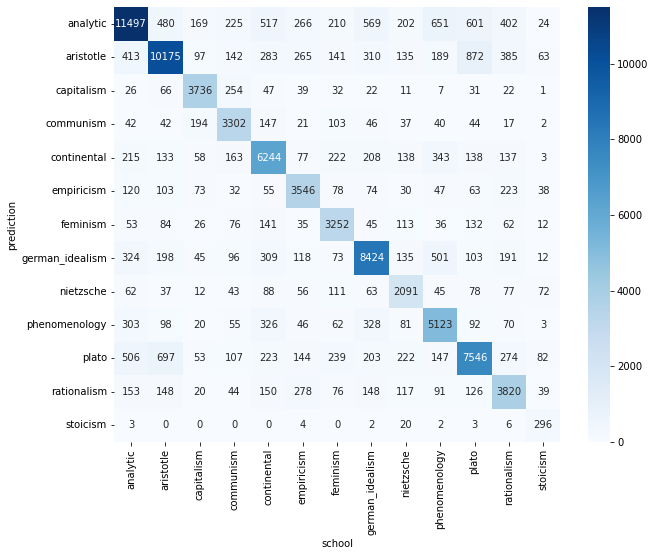

In [41]:
# Visualize confusion matrix
Y_test_pred = pipe_sa.predict(X_test)

# Decode our test set and the prediction on test set to get corresponding school
Y_test_school = encoder.inverse_transform(Y_test.reshape(len(Y_test),1)).reshape(len(Y_test),)
Y_test_pred_school = encoder.inverse_transform(Y_test_pred.reshape(len(Y_test_pred),1)).reshape(len(Y_test_pred),)

cm = pd.crosstab(encoder.inverse_transform(Y_test_pred.reshape(len(Y_test_pred),1)).reshape(len(Y_test_pred),), 
                 encoder.inverse_transform(Y_test.reshape(len(Y_test),1)).reshape(len(Y_test),),
                 rownames = ['prediction'],
                 colnames = ['school'])

plt.figure(figsize=(10,8))
sns.heatmap(data = cm, annot=True, fmt='g', cmap='Blues');

In [42]:
# Randomly select some samples, and check whether our model is able to predict the school they belong to correctly
random.seed(123)
sample_list = random.sample(range(len(df)),10)
df.loc[sample_list,['school', 'sentence_str']]

school                                       sentence_str
27453             plato                We're agreed about imitators, then.
140339         analytic  Even if the words which I say are those which,...
45710         aristotle  Perhaps the necessary is present also in the d...
213511      continental  If this constitutes a system of writing, it is...
139750         analytic  For if we too in these investigations are tryi...
56465         aristotle  All animals are furnished with fat, either int...
20003             plato  , that I hold to be worth all the other contes...
198770      continental  But all these positive elements which constitu...
281124  german_idealism                          heingand its own reality.
294816        communism          Hence, the Shylock law of the Ten Tables.

In [43]:
# Create a new test set
X_test_new = df.sentence_str.loc[sample_list].tolist()
Y_test_new = df.school.loc[sample_list].tolist()

In [44]:
Y_predict = pipe_sa.predict(X_test_new) # Use our model to make prediction on the new test set 
Y_predict_school = encoder.inverse_transform(Y_predict.reshape(10,1)).reshape(10,) # Decode our prediction to get corresponding school
prediction = pd.DataFrame(data = {'sentence_str': X_test_new,
                                  'school': Y_test_new,
                                  'school_predict': Y_predict_school,
                                  'predict_outcome': Y_test_new == Y_predict_school},
                          index = sample_list)
prediction

sentence_str           school  \
27453                 We're agreed about imitators, then.            plato   
140339  Even if the words which I say are those which,...         analytic   
45710   Perhaps the necessary is present also in the d...        aristotle   
213511  If this constitutes a system of writing, it is...      continental   
139750  For if we too in these investigations are tryi...         analytic   
56465   All animals are furnished with fat, either int...        aristotle   
20003   , that I hold to be worth all the other contes...            plato   
198770  But all these positive elements which constitu...      continental   
281124                          heingand its own reality.  german_idealism   
294816          Hence, the Shylock law of the Ten Tables.        communism   

         school_predict  predict_outcome  
27453             plato             True  
140339         analytic             True  
45710         aristotle             True  
213511      continental             True  
139750    phenomenology            False  
56465         aristotle             True  
20003             plato             True  
198770      continental             True  
281124  german_idealism             True  
294816  german_idealism            False

In the last step, all sentence strings were converted into matrix of token number, on which logistic regression classifier was fitted. On the test set, our model accuracy is about 76%. Then 10 sentences were randomly selected to test the accuracy of our model in reality. As a result, among these 10 samples, only two sentences were predicted incorrectly. According to our previous conclusion, 'analytic' and 'phenomenology' are very similar. Therefore, for the 139750th sample, this wrong prediction is relatively pardonable.